In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/crab/Crab_dataset_price.csv')
data.head()


,No. of crab,Carapace Width Before (cm),Carapace Width After (cm),Size of Increment (cm),Body Weight Before (g),Body Weight After (g),Size of Increment (g),Crab Price
0,1,7.71,8.91,1.20,103.7,110.5,6.8,0.506090
1,2,6.81,7.49,0.68,62.5,69.8,7.3,0.319684
2,3,7.11,8.02,0.91,79.1,88.3,9.2,0.404414
3,4,7.61,8.65,1.04,78.5,86.7,8.2,0.397086
4,5,6.74,7.35,0.61,60.3,68.7,8.4,0.314646


In [3]:
import pandas as pd

column_to_delete = ['No. of crab']
data = data.drop(column_to_delete, axis=1)

output_file_path = '/content/drive/MyDrive/crab/Crab_dataset_price33.csv'
data.to_csv(output_file_path, index=False)

In [4]:
data = pd.read_csv('/content/drive/MyDrive/crab/Crab_dataset_price33.csv')
data.head()

,Carapace Width Before (cm),Carapace Width After (cm),Size of Increment (cm),Body Weight Before (g),Body Weight After (g),Size of Increment (g),Crab Price
0,7.71,8.91,1.20,103.7,110.5,6.8,0.506090
1,6.81,7.49,0.68,62.5,69.8,7.3,0.319684
2,7.11,8.02,0.91,79.1,88.3,9.2,0.404414
3,7.61,8.65,1.04,78.5,86.7,8.2,0.397086
4,6.74,7.35,0.61,60.3,68.7,8.4,0.314646


In [5]:
X = data.drop(['Crab Price'], axis=1)
y = data['Crab Price']

# Display the modified feature dataset
print(X)

# Display the target dataset
print(y)



     Carapace Width Before (cm)  Carapace Width After (cm)  \
0                          7.71                       8.91   
1                          6.81                       7.49   
2                          7.11                       8.02   
3                          7.61                       8.65   
4                          6.74                       7.35   
..                          ...                        ...   
130                        7.62                       8.55   
131                        8.90                       9.90   
132                        8.35                       9.44   
133                        7.43                       8.82   
134                        8.67                      10.17   

     Size of Increment (cm)  Body Weight Before (g)  Body Weight After (g)  \
0                      1.20                   103.7                  110.5   
1                      0.68                    62.5                   69.8   
2                    

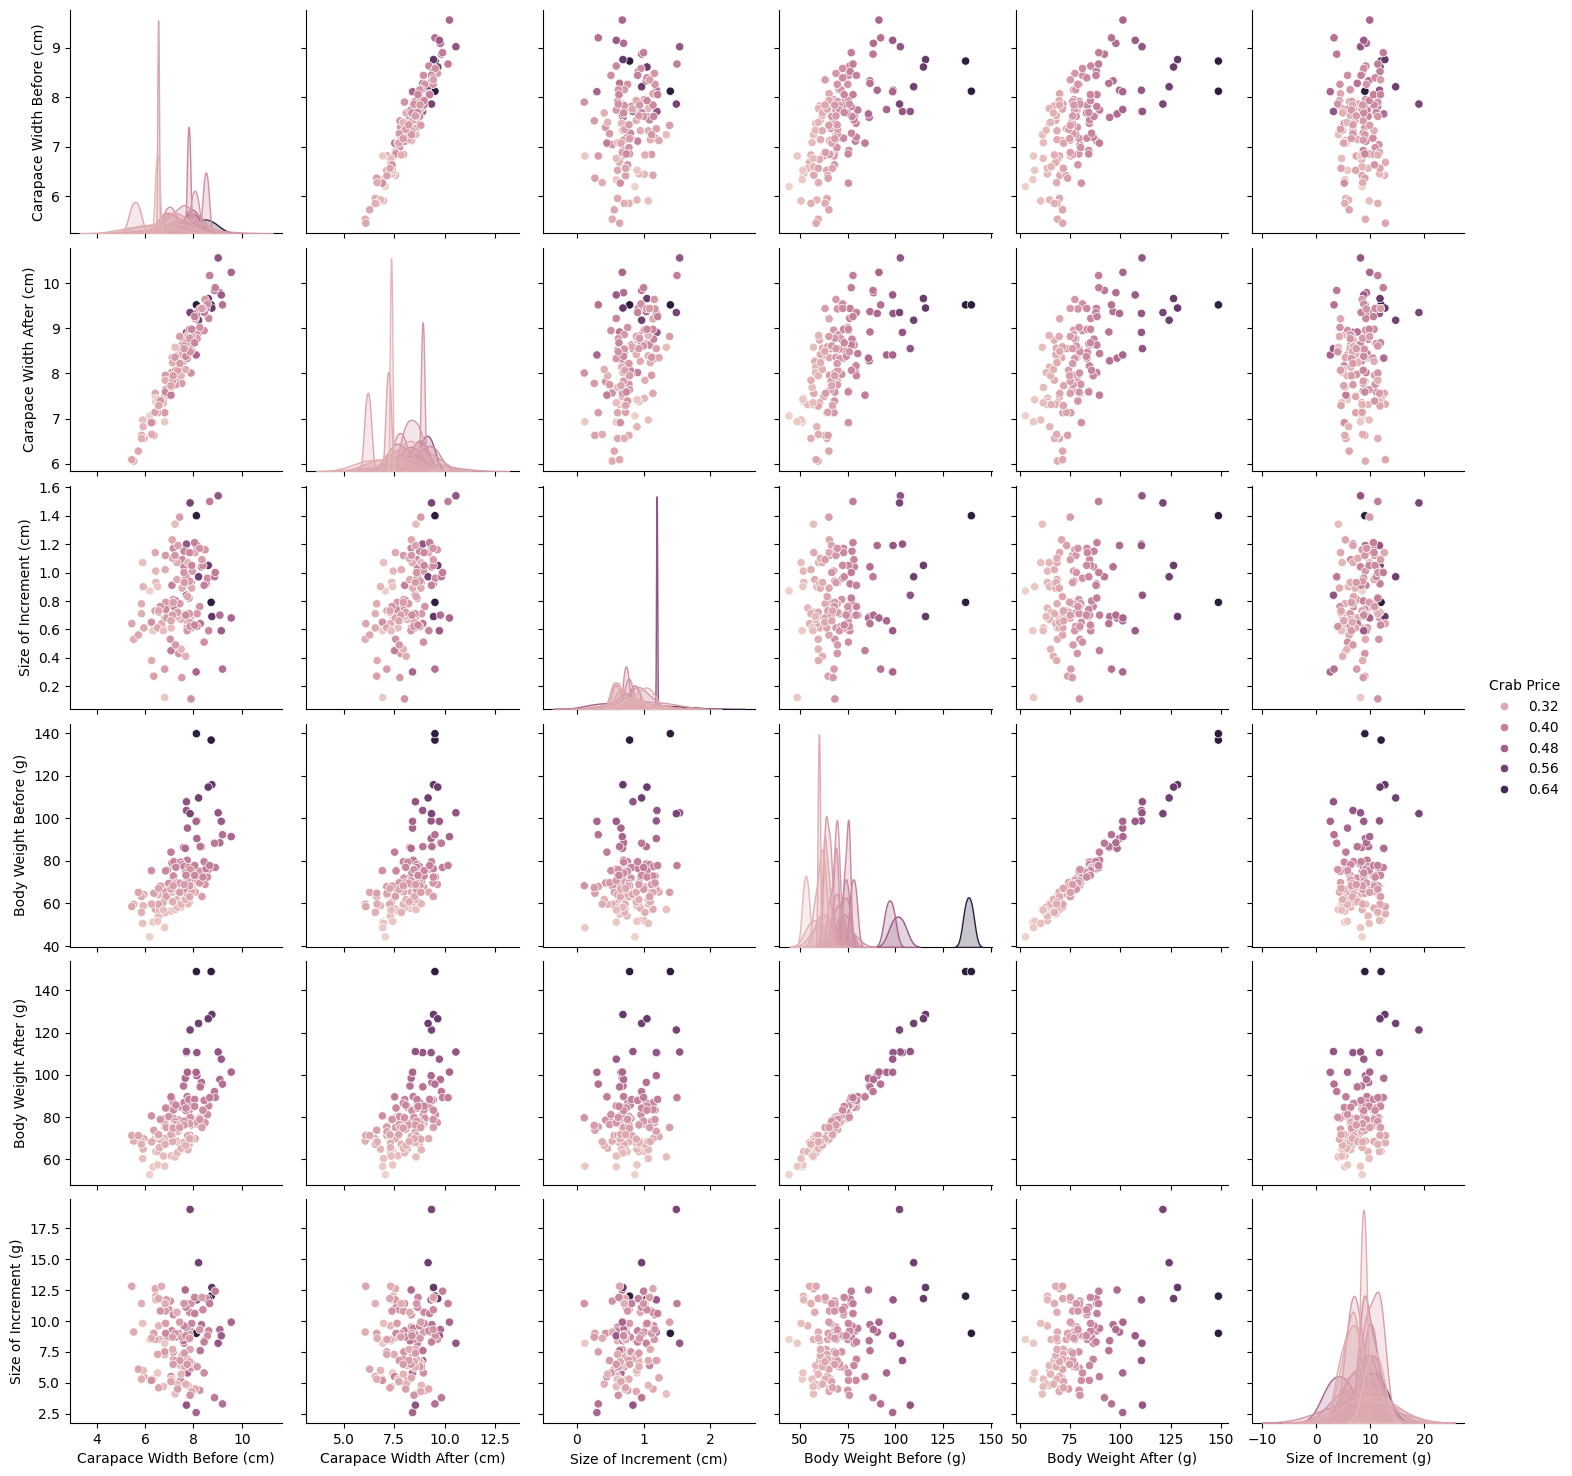

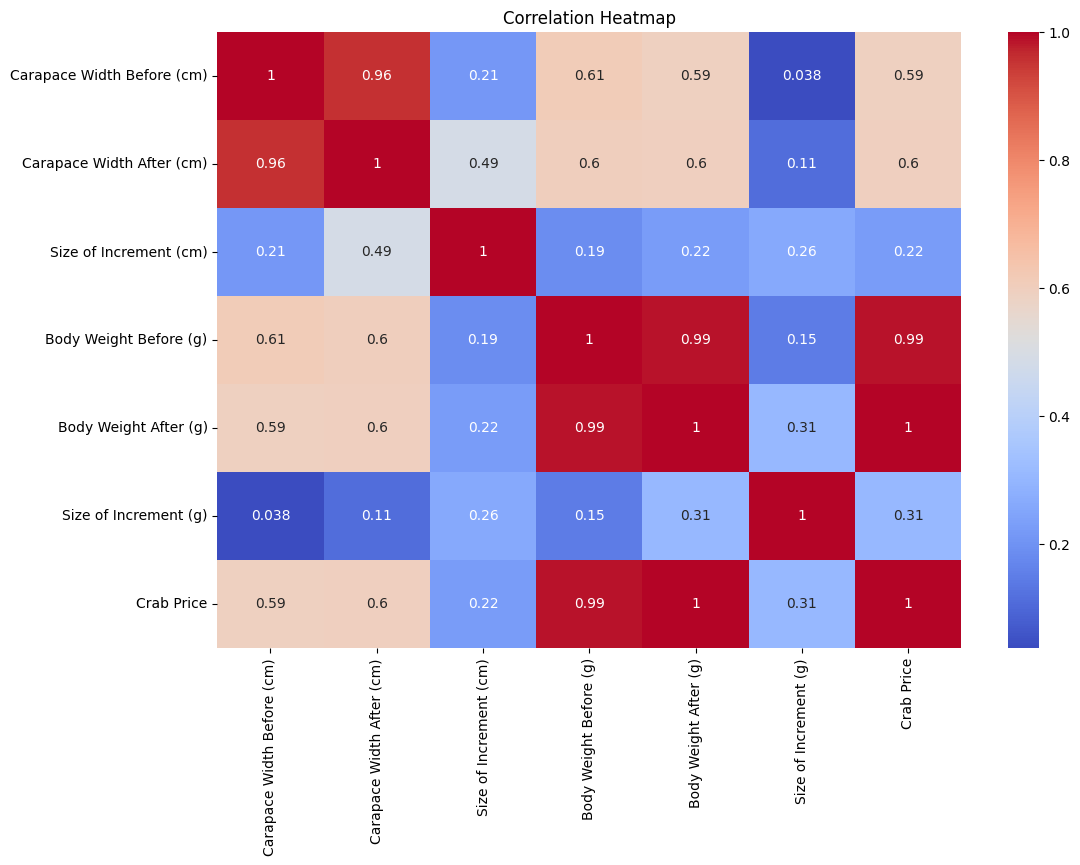

In [6]:
# Let's explore the dataset by visualizing the distributions and relationships between variables
sns.pairplot(data, hue='Crab Price')
plt.show()

# Correlation Heatmap
corr = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [7]:
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [8]:
!pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=78fe61d6a13aa3987f327ddc441bf7a75d9ac464edc388ea8c126d6969b0ea17
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LassoCV
import lime
import lime.lime_tabular
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Assuming you have your data loaded in X_train, X_val, y_train, y_val as per your previous code

# Train LassoCV model
lasso_model = make_pipeline(StandardScaler(), LassoCV(cv=5))
lasso_model.fit(X_train, y_train)

# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                   feature_names=X_train.columns,
                                                   class_names=['Crab Price'],
                                                   mode='regression')

# Define function to predict using LassoCV model
predict_fn = lambda x: lasso_model.predict(x).reshape(-1, 1)

# Select an observation from the validation set for which you want to explain predictions
observation_idx = 0  # Change this index according to your choice

# Explain the prediction for the selected observation
exp = explainer.explain_instance(X_val.values[observation_idx],
                                 predict_fn,
                                 num_features=len(X_train.columns))

# Plot the explanation for feature importance
exp.show_in_notebook(show_table=True, show_all=False)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.932e-05, tolerance: 5.220e-05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.932e-05, tolerance: 5.220e-05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Actual Value: 0.349454
Predicted Value: 0.349509600558413


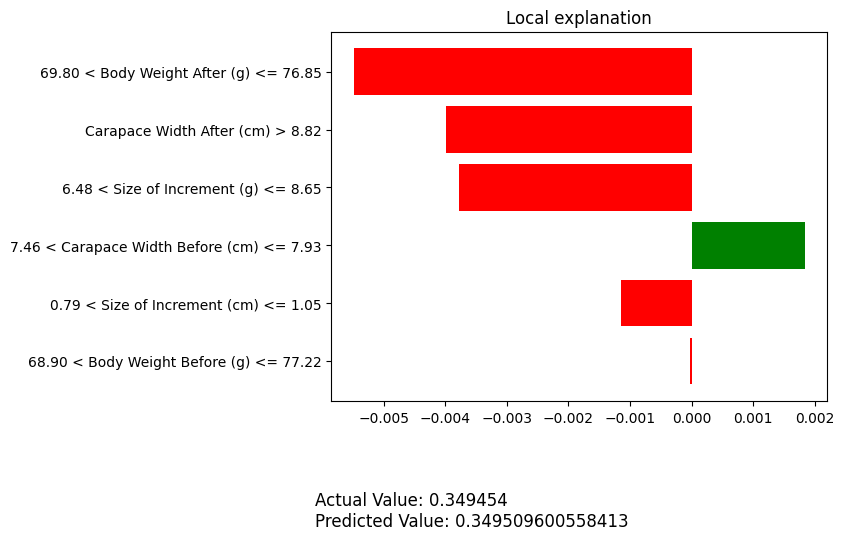

In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LassoCV
import lime
import lime.lime_tabular
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Assuming you have your data loaded in X_train, X_val, y_train, y_val as per your previous code

# Train LassoCV model
lasso_model = make_pipeline(StandardScaler(), LassoCV(cv=5))
lasso_model.fit(X_train, y_train)

# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                   feature_names=X_train.columns,
                                                   class_names=['Crab Price'],
                                                   mode='regression')

# Define function to predict using LassoCV model
predict_fn = lambda x: lasso_model.predict(x).reshape(-1, 1)

# Select an instance for which you want to explain predictions
# For example, let's say the instance is the first instance in the validation set
instance_idx = 0  # Change this index according to your choice

# Get the actual and predicted values for the selected instance
actual_value = y_val.iloc[instance_idx]
predicted_value = lasso_model.predict(X_val.iloc[[instance_idx]]).squeeze()

# Explain the prediction for the selected instance
exp = explainer.explain_instance(X_val.values[instance_idx],
                                 predict_fn,
                                 num_features=len(X_train.columns))

# Plot the explanation for feature importance
fig = exp.as_pyplot_figure()

# Save the plot along with actual and predicted values in a PDF file
with PdfPages('explanation_plot3.pdf') as pdf:
    pdf.savefig(fig)
    plt.text(0.1, -0.15, f"Actual Value: {actual_value}\nPredicted Value: {predicted_value}", transform=fig.transFigure, fontsize=12)

# Print actual and predicted values
print("Actual Value:", actual_value)
print("Predicted Value:", predicted_value)
